In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
matplotlib.style.use('ggplot')

In [2]:
%matplotlib inline

In [3]:
file= r'globalterrorismdb_0617dist.xlsx'
#file= r'C:\Users\dejavu\Desktop\git_jupyter\springboard_mini_project\capstone_projects/globalterrorismdb_0617dist.xlsx'
df= pd.read_excel(file)

In [4]:
#restrict this dataset to occurrences in the US.
df1= df['country_txt'].str.contains('United States')
df2= df[df1]
df2.head(3)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
5,197001010002,1970,1,1,NaN,0,NaT,217,United States,1,...,"The Cairo Chief of Police, William Petersen, r...","""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9,-9,0,-9,NaN
7,197001020002,1970,1,2,NaN,0,NaT,217,United States,1,...,"Damages were estimated to be between $20,000-$...",Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...",NaN,Hewitt Project,-9,-9,0,-9,NaN
8,197001020003,1970,1,2,NaN,0,NaT,217,United States,1,...,The New Years Gang issue a communiqué to a loc...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...","The Wisconsin Cartographers' Guild, ""Wisconsin...",Hewitt Project,0,0,0,0,NaN


In [5]:
class wr_ppro():
    '''Used for data wrangling and some initial preprocessing'''
    def __init__(self):
        ''''''
    def drop_col_nan(self, x, threshold):
        for col in x.columns:
            amt = sum(x[col].isnull())/float(len(x)) * 100
            if amt > threshold:
                x = x.drop(col,1)
                pd.set_option('display.max_columns', None)
        return x
        
    def drop_noisy_col(self, y, w=[]):
        y=y.drop(w, 1)
        return y
                
    def drop_col_txt(self, z):
        for c in z.columns:
            c = str(c)
            if c[-3:] =='txt':
                z = z.drop(c, 1)
                pd.set_option('display.max_columns', None)
        return z     

In [6]:
df3=wr_ppro().drop_col_nan(df2, 80)

In [7]:
df3.index = range(len(df2))

In [8]:
df4=wr_ppro().drop_col_txt(df3)

In [9]:
df5=wr_ppro().drop_noisy_col(df4, ['corp1', 'motive', 'target1', 'weapdetail','country','addnotes', 'summary', 'scite1' , 'scite2' , 'scite3' , 'dbsource','longitude','specificity', 'eventid', 'location','region', 'propcomment', 'latitude'])

In [10]:
from sklearn.base import TransformerMixin

class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.
        Columns of dtype object are imputed with the most frequent value 
        in column.
        Columns of other types are imputed with median of column.
        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].median() for c in X],
            index=X.columns)
        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

In [11]:
df6 = DataFrameImputer().fit_transform(df5)
df6.head()

,iyear,imonth,iday,extended,provstate,city,vicinity,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,targtype1,targsubtype1,natlty1,gname,guncertain1,individual,nperps,nperpcap,claimed,weaptype1,weapsubtype1,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,ransom,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,1970,1,1,0,Illinois,Cairo,0,1,1,1,0,0,1,0,2,3,22.0,217.0,Black Nationalists,0.0,0,-99.0,-99.0,0.0,5,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,5000.0,0.0,0.0,-9,-9,0,-9
1,1970,1,2,0,California,Oakland,0,1,1,1,1,0,1,0,3,21,107.0,217.0,Unknown,0.0,0,-99.0,-99.0,0.0,6,16.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,22500.0,0.0,0.0,-9,-9,0,-9
2,1970,1,2,0,Wisconsin,Madison,0,1,1,1,0,0,1,0,7,4,28.0,217.0,New Year's Gang,0.0,0,1.0,1.0,1.0,8,19.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,60000.0,0.0,0.0,0,0,0,0
3,1970,1,3,0,Wisconsin,Madison,0,1,1,1,0,0,1,0,7,2,21.0,217.0,New Year's Gang,0.0,0,1.0,1.0,0.0,8,20.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,5000.0,0.0,0.0,0,0,0,0
4,1970,1,1,0,Wisconsin,Baraboo,0,1,1,0,1,0,0,0,3,4,27.0,217.0,"Weather Underground, Weathermen",0.0,0,-99.0,-99.0,0.0,6,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0,3.0,0.0,0.0,0.0,0,0,0,0


In [12]:
df7 = df6[df6['gname'] != 'Unknown']
df7.shape

(2206, 41)

In [13]:
# this will be useful in future analysis as an out of sample dataset 
df8 = df6[df6['gname'] == 'Unknown']
df8.shape

(552, 41)

In [14]:
df9 = df7.reset_index(drop=True)
df9.head()

,iyear,imonth,iday,extended,provstate,city,vicinity,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,targtype1,targsubtype1,natlty1,gname,guncertain1,individual,nperps,nperpcap,claimed,weaptype1,weapsubtype1,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,ransom,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,1970,1,1,0,Illinois,Cairo,0,1,1,1,0,0,1,0,2,3,22.0,217.0,Black Nationalists,0.0,0,-99.0,-99.0,0.0,5,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,5000.0,0.0,0.0,-9,-9,0,-9
1,1970,1,2,0,Wisconsin,Madison,0,1,1,1,0,0,1,0,7,4,28.0,217.0,New Year's Gang,0.0,0,1.0,1.0,1.0,8,19.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,60000.0,0.0,0.0,0,0,0,0
2,1970,1,3,0,Wisconsin,Madison,0,1,1,1,0,0,1,0,7,2,21.0,217.0,New Year's Gang,0.0,0,1.0,1.0,0.0,8,20.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,5000.0,0.0,0.0,0,0,0,0
3,1970,1,1,0,Wisconsin,Baraboo,0,1,1,0,1,0,0,0,3,4,27.0,217.0,"Weather Underground, Weathermen",0.0,0,-99.0,-99.0,0.0,6,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0,3.0,0.0,0.0,0.0,0,0,0,0
4,1970,1,6,0,Colorado,Denver,0,1,1,1,1,0,1,0,7,4,28.0,217.0,Left-Wing Militants,0.0,0,-99.0,-99.0,0.0,8,19.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,305.0,0.0,0.0,-9,-9,0,-9


In [15]:
df10 = df9[(df9['INT_LOG'] != -9) & (df9['INT_MISC'] !=-9) & (df9['INT_ANY'] != -9) & (df9['INT_IDEO'] != -9)]
df11= df10.reset_index(drop=True)

In [16]:
df12 = DataFrameImputer().fit_transform(df11)

In [17]:
df13 = df12[["iyear", "INT_IDEO"]]
df13.head()

,iyear,INT_IDEO
0,1970,0
1,1970,0
2,1970,0
3,1970,0
4,1970,1


In [18]:
citizenship = []
for x in df13['INT_IDEO']:
    if x == 0:
        x = 'american'
    else: 
        x = 'foreigner'
    citizenship.append(x)

In [19]:
df13['citizenship'] = citizenship

/home/azure052/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [20]:
df13.head()

,iyear,INT_IDEO,citizenship
0,1970,0,american
1,1970,0,american
2,1970,0,american
3,1970,0,american
4,1970,1,foreigner


### Exploratory data analysis

A good and probably the best way to represent a categorical variable is the bar or pie chart because we are looking at the comparison between proportions. So, I will be using both in this analysis.

The first question we need to ask of the data is, since 1970 - when the collection of terrorism data started, till date, which is more than a period of over forty-five years, can we say the proportion of known attacks perpetrated by foreigners is same as those of citizens of the US?

(array([0, 1]), <a list of 2 Text xticklabel objects>)

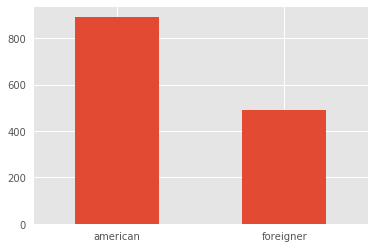

In [21]:
df13['citizenship'].value_counts().plot(kind='bar')
plt.xticks(rotation=-360)   # Rotate x-labels

In [22]:
df13['citizenship'].value_counts()

american     892
foreigner    492
Name: citizenship, dtype: int64

In [43]:
(df13[df13['citizenship']== 'foreigner']['citizenship'].count())/len(df13)

0.3554913294797688

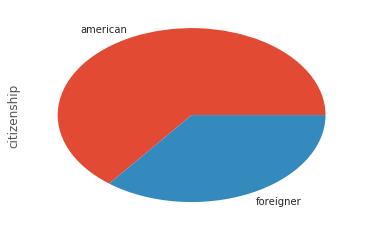

In [26]:
df13['citizenship'].value_counts().plot(kind='pie')

The data stand to disagree. This plot shows attacks by foreigners is about 35% of known attacks in the USA. Please, note that I said "known attacks." The whole dataset had cases for Americans, foreigners and those whose perpetrators are unknown. It is possible for the unknown instances to swing the pendulum either way. However, as I demonstrated in the inferential statistics part of the overall tasks, if we take the known cases as a sample of the whole population that comprises all instances, and ensuring we meet certain statistical conditions, we can generalize findings from the known to the unknowns

The second question I would probably look at is that: are there trends associated with this finding?

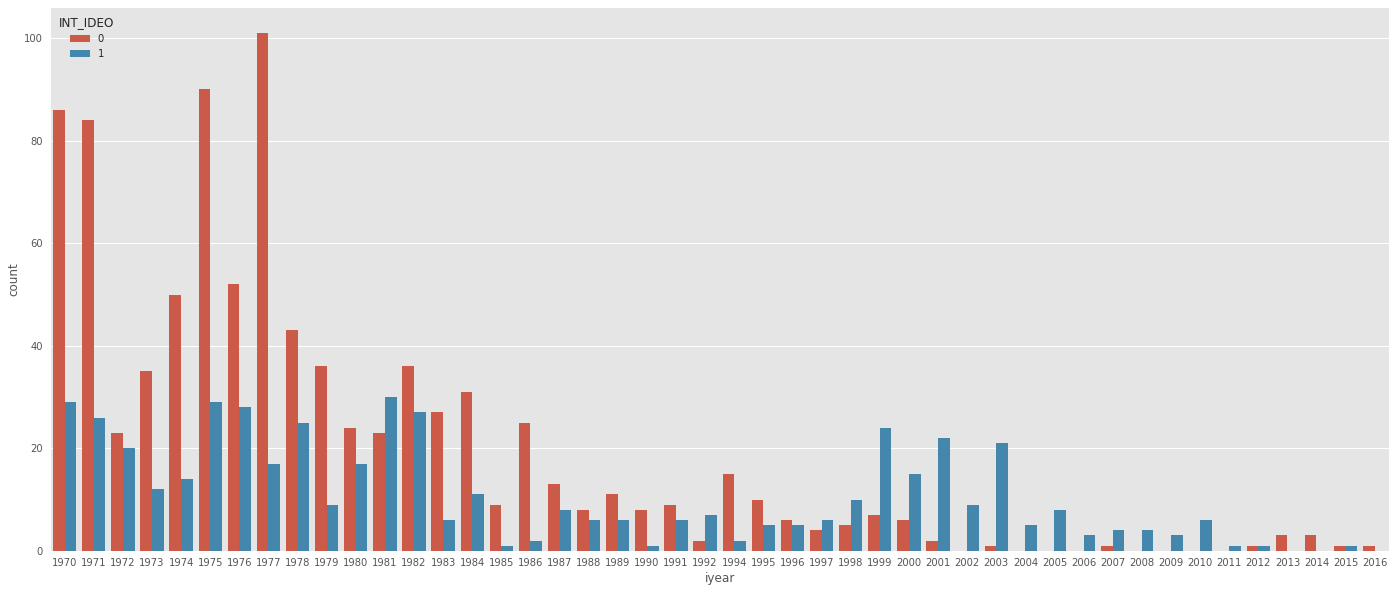

In [46]:
fig = plt.figure(figsize=(24, 10))
fig.add_subplot(1,1,1)
sns.countplot(x="iyear", hue="INT_IDEO", data=df12)

The 2-dimensional chart above shows the overall trend of attacks in the US, with zero (0) representing Americans and a one(1) being a foreign citizen. This plot shows overall attack trend was much higher 30 to 40 years ago compared to what we have now. It is probably because of social awareness and technological advancement in curbing such occurrences. The unknown cases were cut out in this plot. Those cases according to data owners at the University of Maryland, are people with unidentified citizenship. 

For cases that are known and well identified, we see Americans perpetrated more attacks against fellow citizens from 1970 up till about 1997. Around 1997, foreign attacks on home soil equaled and surpassed that of local attack. This alien attack on home soil peaked in 1999, went down a little around 2001 and then dropped significantly in 2004. After declining in 2004, it remained somewhat constant at that level till 2010 before falling dramatically again around 2011. After this drop, it has continued at this level to date. While attacks by fellow Americans remained at the same level as that of foreign nationals as of 2015, nothing is known yet about years after that. It suffices to say that going by recent occurrences after 2015; I guess that attacks by Americans on fellow citizens have surpassed that of foreigners on the home soil. This analysis will be updated with that information as soon as the University of Maryland updates the Global Terrorism Database. 

In conclusion, this analysis shows a correlation between terrorist attacks and nationalities of individuals. Correlation does not necessarily mean causation without a designed experiment. However, residents in the USA - both citizens and non-citizens, should change their mindset in that a terrorist attack is as likely to be perpetrated by an American as a foreigner. Even more so an American on home soil.